
Script prepared by Dr. Dasaraden Mauree                 
Contact: EPFL                                           
  dasaraden.mauree@epfl.ch / dasaraden.mauree@gmail.com  
                                                         
   use this script to read surface temperature data from MoTUS,   
   calculate mean data and to create some plots.   

In [1]:
#importing necessary packages

import glob
import pandas as pd
import numpy as np
import math
from datetime import datetime, timedelta
import re


path =r'data' # use your path
#allFiles = glob.glob(path + "/*anem*")
j = pd.DataFrame()
hourlymean = pd.DataFrame()
df=pd.DataFrame()
eachday=pd.DataFrame()
result=pd.DataFrame()

#Declaring all variables 
grdtemp=[]      #Ground temperature [°C] (Assumed to be roughly equal to ambiant temperature. May be lower than ambient temperature during the night and higher during the day.)
northtemp=[]    #Façade facing North [°C]
easttemp=[]     #Façade facing East [°C]
southtemp=[]    #Façade facing South [°C]
westtemp=[]     #Façade facing West [°C]
time=[]         #Timestamp

#Opening file and saving in array
allFiles = glob.glob(path + "/*TempAll.txt") 
    
for file in allFiles:
        
    fil=pd.read_csv(file, header=None, comment=',', error_bad_lines=False) #for20hz anem
    fileArray=np.array(fil)
              
    for k,line in enumerate(fileArray):
    
            #Reading time step
        timeStr=line[-1]
        contime=datetime.strptime(' '.join([timeStr]), '%d.%m.%Y %H:%M:%S')
          
            #storing in individual array
        time.append(contime)
        grdtemp.append(float(line[0]))
        northtemp.append(float(line[1]))
        easttemp.append(float(line[2]))
        southtemp.append(float(line[3]))
        westtemp.append(float(line[4]))
            
    j['datetime']=pd.to_datetime(time)
    j=j.set_index('datetime')
    j['Ground temperature [°C]']=grdtemp
    j['North temperature [°C]']=northtemp
    j['East temperature [°C]']=easttemp
    j['South temperature [°C]']=southtemp
    j['West temperature [°C]']=westtemp

    hourlymean=j.resample('30min').mean()
    hourlymean=hourlymean[:-1]        
    hourlymean=hourlymean.round(1)

    grdtemp,northtemp,easttemp,southtemp,westtemp,time=[],[],[],[],[],[]
    j = pd.DataFrame()
    eachday=eachday.append(hourlymean)
                   
result = eachday.sort_index(axis=0, ascending=True)
result.to_csv('surf_temp.txt', header=True, index=True, sep=' ', mode='a')
hourlymean=pd.DataFrame()
result=pd.DataFrame()

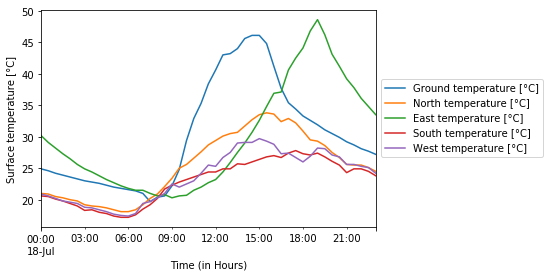

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as dates
%matplotlib inline 
eachday[['Ground temperature [°C]','North temperature [°C]','East temperature [°C]','South temperature [°C]','West temperature [°C]']].plot()
#plt.figtext(0.15,0.85,'(a)')
plt.ylabel('Surface temperature [°C]')
plt.xlabel('Time (in Hours)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off
plt.savefig('surftemp.png', bbox_inches='tight',dpi=1200)